**Train Test and Cross Validation**

In [2]:
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier


In [3]:
# Load training data
data_path = '/workspaces/Final-Year-Project/Cleaned Data/TrainTestData.csv'
df = pd.read_csv(data_path)

# Features and target variable
X = df.drop('Diabetes Status', axis=1)
y = df['Diabetes Status']


In [4]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Decision Tree Classifier setup
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],  # Different depths to test
    'min_samples_split': [2],
}

# KFold cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV setup with F1-score as the scoring parameter
grid_search = GridSearchCV(dt, param_grid, scoring='f1', cv=kf, n_jobs=-1, verbose=1)


In [6]:
# Fit GridSearchCV on the training data
grid_search.fit(X_scaled, y)

# Best Decision Tree model from GridSearchCV
best_dt = grid_search.best_estimator_

# print best parameters
print(grid_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'max_depth': 4, 'min_samples_split': 2}


In [7]:
# Load validation data
valid_path = "/workspaces/Final-Year-Project/Cleaned Data/ValidationData.csv"
df_valid = pd.read_csv(valid_path)

# Prepare features and target for validation data
X_valid = df_valid.drop('Diabetes Status', axis=1)
y_valid = df_valid['Diabetes Status']

# Scale the validation data using the previously fitted scaler
X_valid_scaled = scaler.transform(X_valid)


In [8]:
# Predictions on validation data
y_pred_valid = best_dt.predict(X_valid_scaled)


In [9]:
# Print classification report on validation data
print(f"📌 DT - Validation Classification Report:")
print(classification_report(y_valid, y_pred_valid))

# Print confusion matrix for validation data
print("🟦 DT - Validation Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_valid))


📌 DT - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       178
           1       0.71      0.83      0.77       186

    accuracy                           0.74       364
   macro avg       0.75      0.74      0.74       364
weighted avg       0.75      0.74      0.74       364

🟦 DT - Validation Confusion Matrix:
[[115  63]
 [ 31 155]]


In [10]:
import pandas as pd
from sklearn.metrics import classification_report

# Assuming you already have y_valid (true labels) and y_pred_valid (predicted labels)
# Example classification report for AdaBoost (AB)
report = classification_report(y_valid, y_pred_valid, output_dict=True)

# Extract weighted scores
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']
weighted_f1 = report['weighted avg']['f1-score']
accuracy = report['accuracy']

# Create a dictionary with the scores
ab_results = {
    'Model': 'Decision Tree(DT)',
    'Precision': weighted_precision,
    'Recall': weighted_recall,
    'F1-Score': weighted_f1,
    'Accuracy': accuracy
}

# Convert the dictionary to a DataFrame
ab_df = pd.DataFrame([ab_results])

# Create a DataFrame to store results (if not already created)
results_df = pd.read_csv("/workspaces/Final-Year-Project/Results/model_results.csv")

# Concatenate the new row to the DataFrame
results_df = pd.concat([results_df, ab_df], ignore_index=True)

# Print the DataFrame to confirm it's added
print(results_df)

# Save the DataFrame to a CSV file
results_df.to_csv("/workspaces/Final-Year-Project/Results/model_results.csv", index=False)


                                Model  Precision    Recall  F1-Score  Accuracy
0                       AdaBoost (AB)   0.767212  0.752747  0.748389  0.752747
1                  Neural Network(NN)   0.762241  0.755495  0.753238  0.755495
2                   Decision Tree(DT)   0.748498  0.741758  0.739233  0.741758
3   K Nearest Nearest Neighbours(KNN)   0.723548  0.722527  0.721802  0.722527
4                  Neural Network(NN)   0.775001  0.769231  0.767458  0.769231
5                   Decision Tree(DT)   0.748498  0.741758  0.739233  0.741758
6   K Nearest Nearest Neighbours(KNN)   0.723548  0.722527  0.721802  0.722527
7            Logistic Regression (LR)   0.759684  0.755495  0.753959  0.755495
8            Logistic Regression (LR)   0.759684  0.755495  0.753959  0.755495
9            Logistic Regression (LR)   0.759684  0.755495  0.753959  0.755495
10                  Random Forest(RF)   0.744664  0.741758  0.740463  0.741758
11                  Random Forest(RF)   0.748448  0.

In [11]:
# Recalculate Macro average F1-score on validation data
validation_f1_macro = f1_score(y_valid, y_pred_valid, average='macro')
print(f"🏆 Macro F1-Score on Validation Data: {validation_f1_macro}")


🏆 Macro F1-Score on Validation Data: 0.738601637941572


In [12]:
from sklearn.tree import export_text

# Use column names
feature_names = X.columns

# Get text rules
tree_rules = export_text(best_dt, feature_names=list(feature_names))
print(tree_rules)


|--- RIDAGEYR <= -0.34
|   |--- BMXWAIST <= 0.06
|   |   |--- RIDAGEYR <= -1.54
|   |   |   |--- class: 0
|   |   |--- RIDAGEYR >  -1.54
|   |   |   |--- BMXBMI <= -0.69
|   |   |   |   |--- class: 0
|   |   |   |--- BMXBMI >  -0.69
|   |   |   |   |--- class: 0
|   |--- BMXWAIST >  0.06
|   |   |--- BMXWT <= 1.79
|   |   |   |--- BMXBMI <= -0.01
|   |   |   |   |--- class: 1
|   |   |   |--- BMXBMI >  -0.01
|   |   |   |   |--- class: 0
|   |   |--- BMXWT >  1.79
|   |   |   |--- DMDHHSIZ <= -0.23
|   |   |   |   |--- class: 1
|   |   |   |--- DMDHHSIZ >  -0.23
|   |   |   |   |--- class: 1
|--- RIDAGEYR >  -0.34
|   |--- BMXWAIST <= -0.27
|   |   |--- RIDAGEYR <= 0.69
|   |   |   |--- HUQ010 <= 0.00
|   |   |   |   |--- class: 0
|   |   |   |--- HUQ010 >  0.00
|   |   |   |   |--- class: 1
|   |   |--- RIDAGEYR >  0.69
|   |   |   |--- BMXWAIST <= -0.69
|   |   |   |   |--- class: 0
|   |   |   |--- BMXWAIST >  -0.69
|   |   |   |   |--- class: 1
|   |--- BMXWAIST >  -0.27
|   |   |-

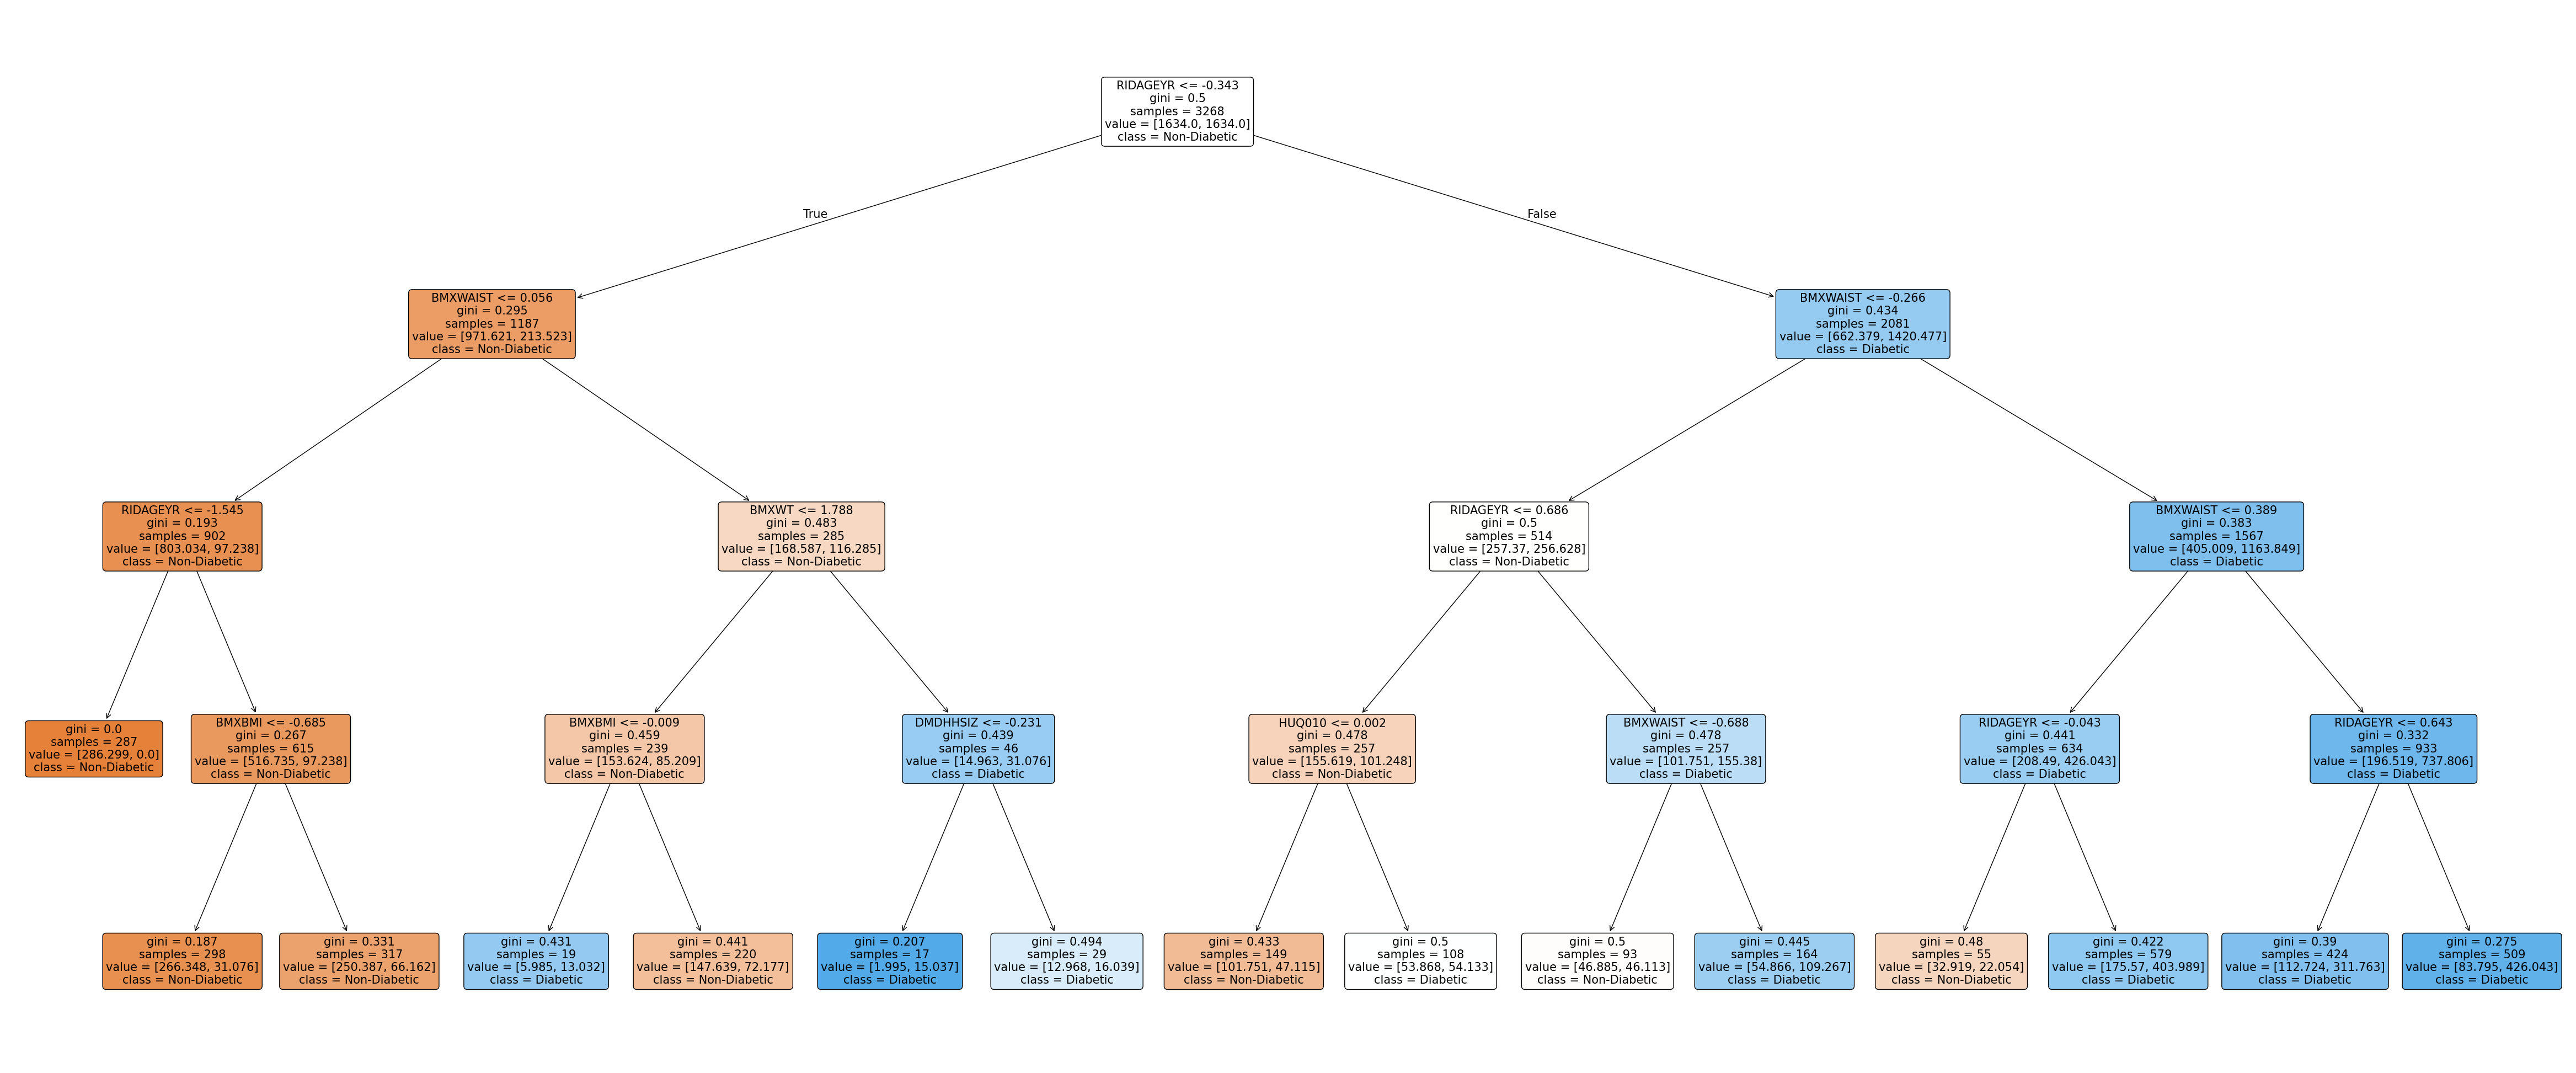

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(60, 25))  # Adjust size as needed
plot_tree(best_dt,
          feature_names=feature_names,
          class_names=['Non-Diabetic', 'Diabetic'],
          filled=True,
          rounded=True,
          fontsize=15)
plt.show()


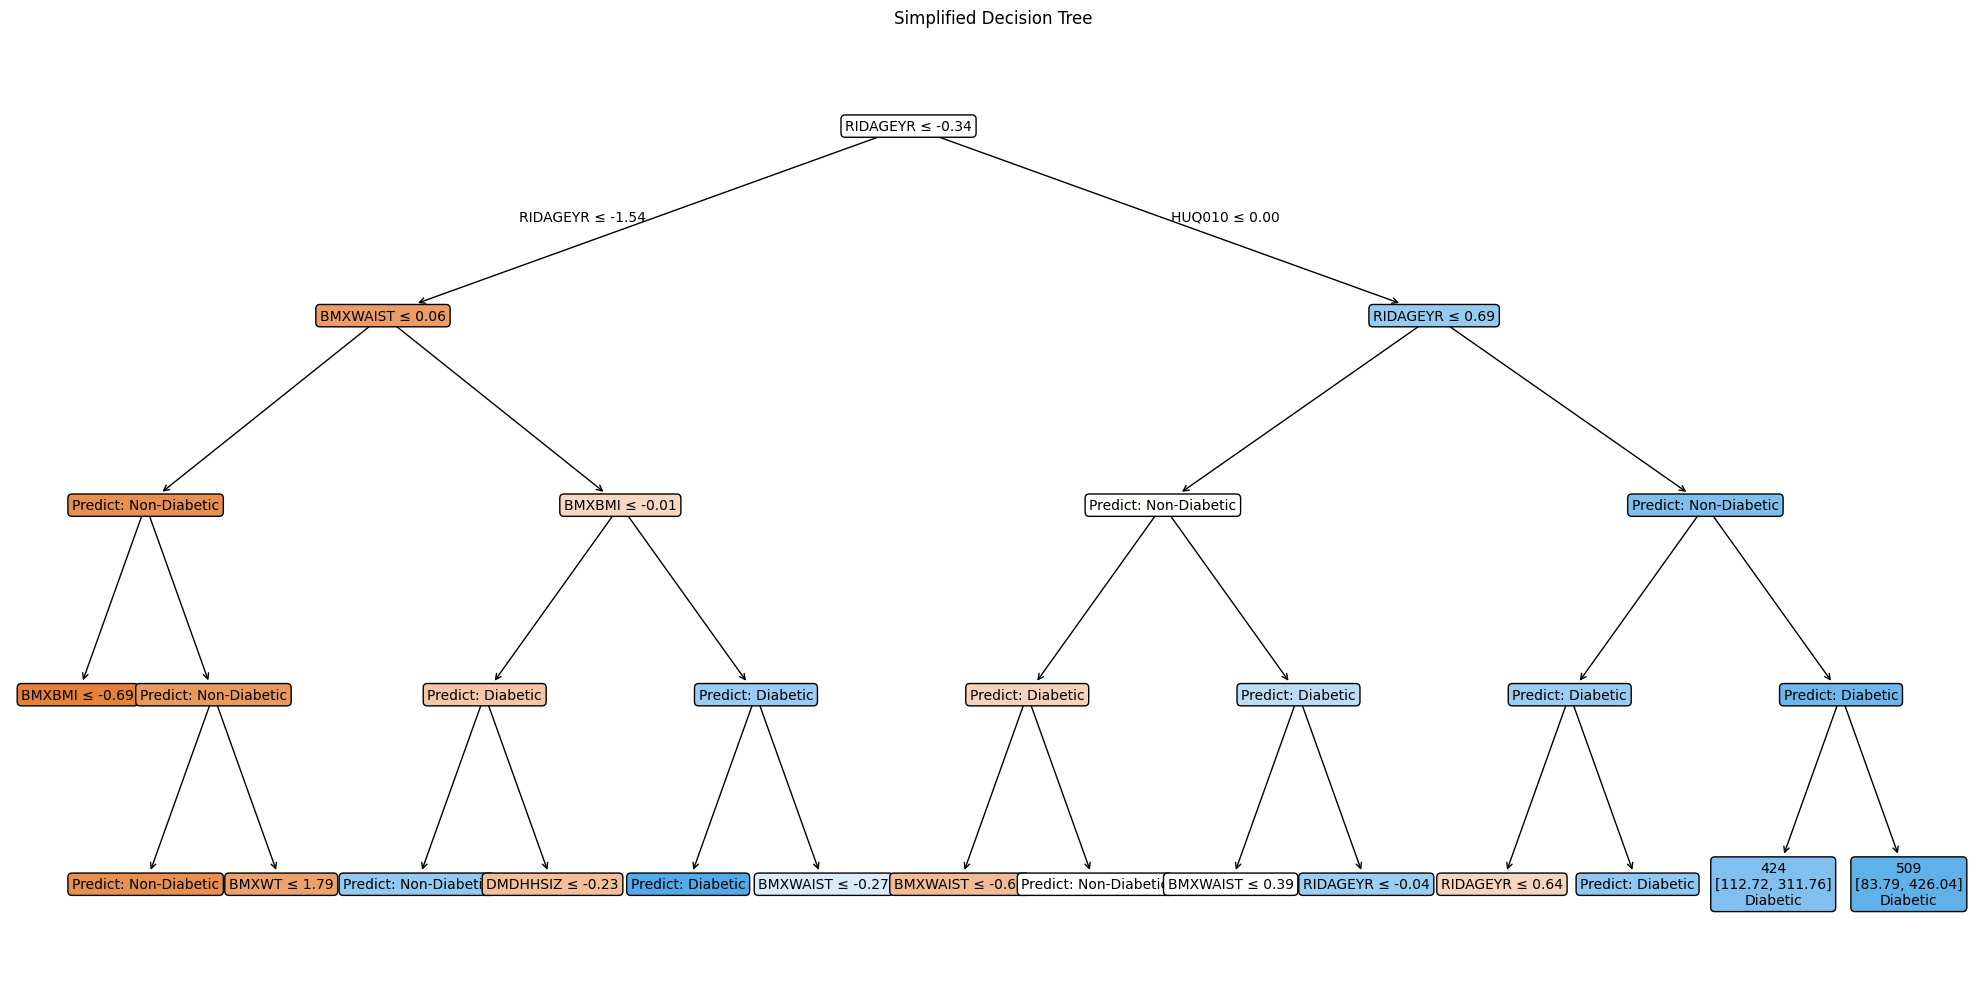

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Function to generate simplified labels
def get_clean_labels(tree, feature_names, class_names):
    labels = []
    for i in range(tree.tree_.node_count):
        if tree.tree_.children_left[i] == tree.tree_.children_right[i]:
            # Leaf node
            values = tree.tree_.value[i][0]
            predicted_class = class_names[values.argmax()]
            labels.append(f"Predict: {predicted_class}")
        else:
            # Split condition
            feat = feature_names[tree.tree_.feature[i]]
            thresh = tree.tree_.threshold[i]
            labels.append(f"{feat} ≤ {thresh:.2f}")
    return labels

# Generate the labels
clean_labels = get_clean_labels(best_dt, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'])

# Plot the tree (use dummy labels to control text boxes)
plt.figure(figsize=(20, 10))
plot = plot_tree(best_dt,
                 feature_names=X.columns,
                 class_names=['Non-Diabetic', 'Diabetic'],
                 filled=True,
                 rounded=True,
                 impurity=False,
                 label='none',
                 precision=2,
                 fontsize=10)

# Apply clean labels only to the nodes that match
for label, text_obj in zip(clean_labels, plt.gca().texts):
    text_obj.set_text(label)

plt.title("Simplified Decision Tree")
plt.tight_layout()
plt.show()


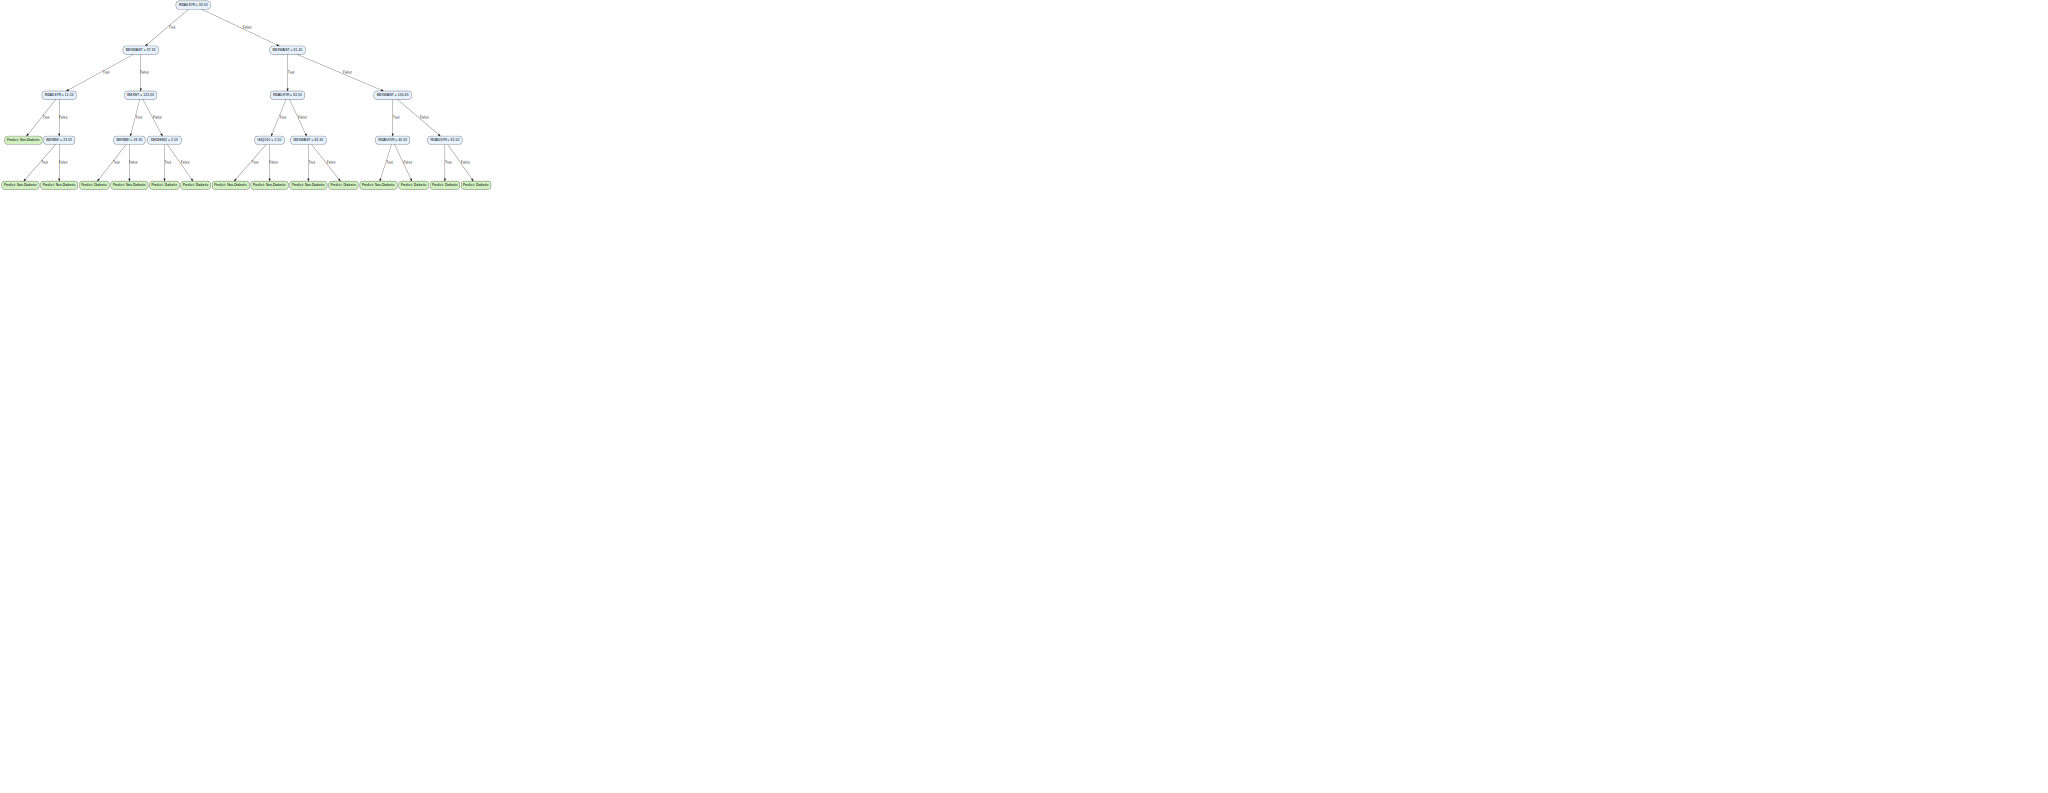

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import _tree
import graphviz
import pandas as pd

# Load unscaled data
df = pd.read_csv('/workspaces/Final-Year-Project/Cleaned Data/TrainTestData.csv')
X_unscaled = df.drop('Diabetes Status', axis=1)
y = df['Diabetes Status']

# Train a clean Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_unscaled, y)

# Class names
class_names = ['Non-Diabetic', 'Diabetic']

# Build the DOT string manually
def traverse_tree(tree, feature_names):
    dot = ['digraph Tree {',
       'graph [nodesep=0.08, ranksep=2.0, dpi=300] ;',  # drop size
       'node [shape=box, style="filled,rounded", fontname=helvetica] ;',
       'edge [fontname=helvetica] ;']


    
    def node_label(node):
        if tree.children_left[node] == _tree.TREE_LEAF:
            value = tree.value[node][0]
            predicted_class = class_names[value.argmax()]
            return f'label="Predict: {predicted_class}", fillcolor="#d0f0c0"'
        else:
            feature = feature_names[tree.feature[node]]
            threshold = tree.threshold[node]
            return f'label="{feature} ≤ {threshold:.2f}", fillcolor="#e6f2ff"'

    def recurse(node):
        dot.append(f'{node} [{node_label(node)}] ;')
        if tree.children_left[node] != _tree.TREE_LEAF:
            for child, direction in [(tree.children_left[node], "True"), 
                                     (tree.children_right[node], "False")]:
                dot.append(f'{node} -> {child} [label="{direction}"] ;')
                recurse(child)

    recurse(0)
    dot.append('}')
    return '\n'.join(dot)

# Generate clean DOT
dot_string = traverse_tree(dt.tree_, feature_names=X_unscaled.columns)

# Render it
graph = graphviz.Source(dot_string)
graph.render("decision_tree_clean", format='png', cleanup=False)
graph
